In [1]:
# check that in priority

# kpeak en fonction de z
# distance de taille angulaire (check icosmos) (pour un objet de taille PHYSIQUE (pas comoving) fixe) en fonction de z
# s'obtient en mettant tout a 0 (en particulier omegam=0)
# angle (radians) for psuedoBAO 150 cMpc structure en fonction de z
# angle (raidans) for EVOLVING (with kpeak) pseudoBAO scale vs z
# l for evolving BAO scale vs z => at z=10 on doit aavoir l~600 (j'ai plutot 900?)
# Mass of BAO structure vs z
# Grav potential at border of structure at BAO scale (GM/c^2r) vs z, should peak at z=20
# efficacite ISW vs z (delta phi durant temps de traversee de la structure)
# amplitude ISW as (deltaT/T) produit de grav pot * efficacite (facteur 2)
# should peak at z~10 with 2e-5. should be 4 e-5 with the factor 2
# last plot ISW deltaT/T as a function of l

# (also, there is a github for https://github.com/cspotz/RAMSES_Bi-Poisson)
# also read some https://www.aanda.org/articles/aa/full_html/2011/01/aa16012-10/aa16012-10.html if I have the time
    

avg density H/m^3 3.2853588737503405
age of the universe as 1/H0 in Gyr 13.96846030961612


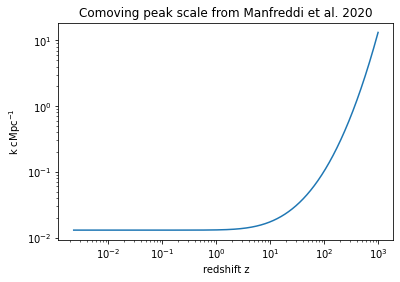

LambdaCDM(H0=70 km / (Mpc s), Om0=0, Ode0=0, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)


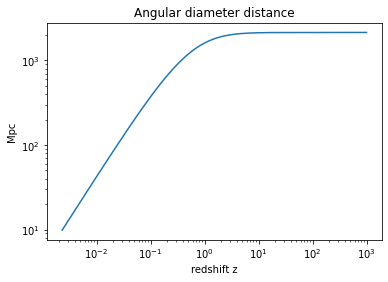

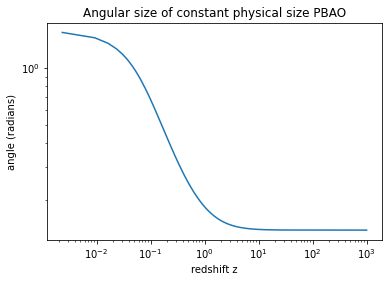

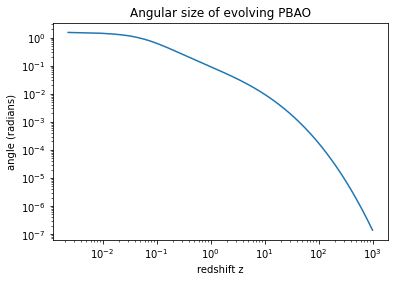

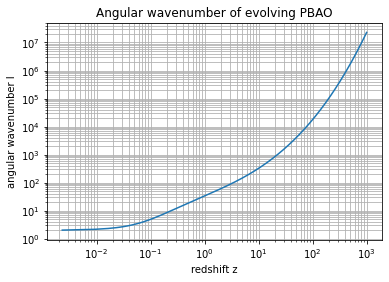

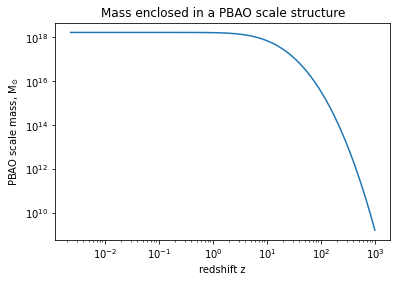

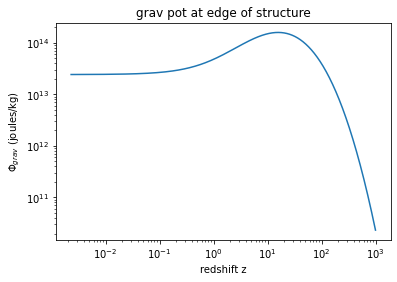

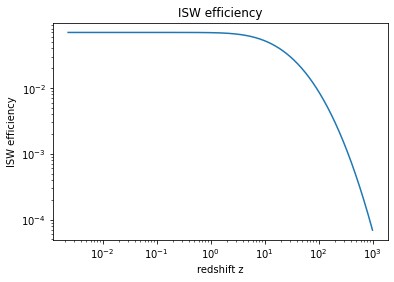

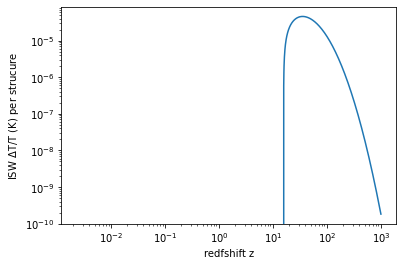

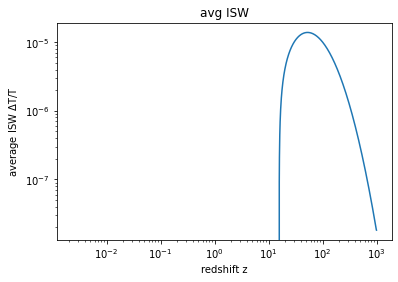

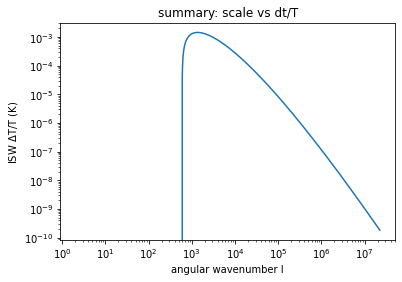

In [121]:
# Unit of k_peak in 1/Mpc
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# a few necessary quantities
#Mpcm=3.085e22 # Mpc in m
# average density:
# a fixer via la nucléosynthèse.
#Le rapport nombre de baryons, en comptant tout le monde en
# protons pour simplifier, car il n’y pratiquement pas de différence
# de masse proton/neutron, est donné par le paramètre \eta:
eta_DM = 8E-9 # Number density of baryons divided by number density of photons in Dirac-Milne
n_phot_CMB_MKSA = 4.13E8 # Number of CMB photons per meter cube at T = 2.7 K
n_avogadro_kg = 6.022E26 # Number of protons in a kilogram
rho_DM_MKSA = eta_DM*n_phot_CMB_MKSA/n_avogadro_kg # Present baryonic density in MKSA units
rho_avg=rho_DM_MKSA
print('avg density H/m^3',rho_DM_MKSA/1.67e-27)

a=np.logspace(-3.,-0.001,1000)
z=1./a-1.
#pseudo-bao scale
pbaoscale=300.*u.Mpc # Mpc
H0=70.
h=H0/100.
H0SI=70.e3*u.m/((1*u.Mpc).to(u.m))/u.s # in 1/s
print('age of the universe as 1/H0 in Gyr',(1./H0SI).to(u.yr)/1.e9/u.yr)
# therefore we can compute time sincer BB from a as
time=a/H0SI # in s

def k_peak_gc(a):
    # IMPORTANT NOTE THIS IS A COMOVING SCALE NOT PHYSICAL!
    # result in h Mpc^-1
    alphakpn=0.021
    # gabriel's value for alphakpn = 0.021
    return 0.013*np.exp(-alphakpn * np.log(a)**3)

plt.plot(z,k_peak_gc(a))
plt.xscale('log')
plt.yscale('log')
plt.ylabel('k cMpc$^{-1}$')
plt.xlabel('redshift z')
plt.title('Comoving peak scale from Manfreddi et al. 2020')
plt.show()

# distance de taille angulaire en Dirac-Milne
from astropy.cosmology import LambdaCDM
#FlatLambdaCDM.angular_diameter_distance(a)
cosmo = LambdaCDM(H0=70.,Om0=0.,Ode0=0.)
print(cosmo)
angdiamdist=cosmo.angular_diameter_distance(z)
plt.plot(z,angdiamdist)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Mpc')
plt.xlabel('redshift z')
plt.title('Angular diameter distance')
plt.show()

# angle for a pbao constant physical size structure at z
plt.plot(z,np.arctan(pbaoscale/angdiamdist))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('angle (radians)')
plt.title('Angular size of constant physical size PBAO')
plt.show()

# angle for a pbao structure of comoving scale pbaoscale (meaning the scale is subject to expansion)
#, whose size is shrinking with kpeak at z AND 
plt.plot(z,np.arctan((a*pbaoscale*k_peak_gc(1)/k_peak_gc(a))/angdiamdist))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('angle (radians)')
plt.title('Angular size of evolving PBAO')
plt.show()

# angular wavenumber for that same evolving PBAO
# NB: PBAO wavelenfgth = 2 * PBAO scale (because a wave must be periodic and has + and -)
ls=2.*np.pi/(2.*np.arctan((a*pbaoscale*k_peak_gc(1)/k_peak_gc(a))/angdiamdist))
plt.plot(z,ls)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('angular wavenumber l')
plt.title('Angular wavenumber of evolving PBAO')
plt.grid(True, which="both", ls="-")
plt.show()

# mass enclosed in PBAO structure vs z
# PBAO structure radius, comoving:
radiusmeters=(pbaoscale*k_peak_gc(1)/k_peak_gc(a)).to(u.m) # in m
# and PBAO mass: note we use rhoavg and not /a^3 because radiusmeters is the COMOVING size of the structure
PBAOmass=(4*np.pi/3)*(rhoavg)*radiusmeters**3 # in kg

plt.plot(z,PBAOmass/2.e30)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('PBAO scale mass, M$_{\odot}$')
plt.title('Mass enclosed in a PBAO scale structure')
plt.show()

# grav potential at the edge of PBAO vs z
# PBAO physical scale
radiusmetersp=(a*pbaoscale*k_peak_gc(1)/k_peak_gc(a)).to(u.m) # in m
phi=6.67e-11*PBAOmass/radiusmetersp
plt.plot(z,phi)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('$\Phi_{grav}$ (joules/kg)')
plt.title('grav pot at edge of structure')
plt.show()


# ISW 'Efficiency' as crossing time / hubble time
# NB this actually does not enter the final ISW dT/T
tcross=radiusmetersp/3.e8 # just PBAO physical size divided by c
plt.plot(z,tcross/time)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redshift z')
plt.ylabel('ISW efficiency')
plt.title('ISW efficiency')
plt.show()


# CMB Temperature variaition due to ISW computed as (2/c^2) * (dphi/dt) * tcross  where tcorss is the crossing time of the structure
# this is the change in energy expected as the photon crosses the structure
# note for delta phi/dt we can either do the whole symbolic derivation OR do a numerical derivative as:
dphi=np.gradient(phi) # np.gradient(phi) has same size as phi
dt=np.gradient(time)
ISWdTsT=(2/(3.e8)**2)*(dphi/dt)*tcross
plt.plot(z,ISWdTsT)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('redfshift z')
plt.ylabel('ISW $\Delta$T/T (K) per strucure')
plt.title('ISW per structure')
plt.show()

# average ISW, i.e. accounting for the weight of each redshift slice
# thats required because not every photon crosses one whole structure at each time slice.
# In fact, photons cross only a fraction of a strucrture at each time slice so eacg slice can obnly contrivyte a fraction of the
# stryctyre it contains at low z and many structures at high z (plot dt/tcross to check)
aveISW=ISWdTsT*(dt/tcross)
plt.plot(z,aveISW)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('average ISW $\Delta$T/T')
plt.xlabel('redshift z')
plt.title('avg ISW')
plt.show()


# and now the dt/T as a function of ls:
plt.plot(ls,ISWdtst)
plt.xlabel('angular wavenumber l')
plt.ylabel('ISW $\Delta$T/T (K)')
plt.xscale('log')
plt.yscale('log')
plt.title('summary: scale vs dT/T')
plt.show()




In [106]:
# time derivative of phi:
da=a[1]-a[0]
dphida=np.gradient(phi,da)
len(dt)

TypeError: 'Quantity' object with a scalar value has no len()

In [114]:
dt=np.gradient(time)
print(len(dt))
print(len(time))

1000
1000


In [113]:
print(time)

[4.40811083e+14 4.43868686e+14 4.46947497e+14 4.50047663e+14
 4.53169334e+14 4.56312657e+14 4.59477783e+14 4.62664864e+14
 4.65874051e+14 4.69105498e+14 4.72359360e+14 4.75635791e+14
 4.78934949e+14 4.82256990e+14 4.85602074e+14 4.88970361e+14
 4.92362011e+14 4.95777187e+14 4.99216052e+14 5.02678769e+14
 5.06165506e+14 5.09676427e+14 5.13211701e+14 5.16771496e+14
 5.20355984e+14 5.23965335e+14 5.27599721e+14 5.31259317e+14
 5.34944296e+14 5.38654836e+14 5.42391113e+14 5.46153306e+14
 5.49941595e+14 5.53756161e+14 5.57597186e+14 5.61464853e+14
 5.65359348e+14 5.69280856e+14 5.73229565e+14 5.77205663e+14
 5.81209341e+14 5.85240789e+14 5.89300201e+14 5.93387770e+14
 5.97503692e+14 6.01648163e+14 6.05821382e+14 6.10023547e+14
 6.14254860e+14 6.18515522e+14 6.22805738e+14 6.27125712e+14
 6.31475651e+14 6.35855762e+14 6.40266255e+14 6.44707341e+14
 6.49179231e+14 6.53682140e+14 6.58216282e+14 6.62781875e+14
 6.67379136e+14 6.72008285e+14 6.76669543e+14 6.81363133e+14
 6.86089280e+14 6.908482

In [115]:
tcross

<Quantity [3.04210582e+10, 3.12746053e+10, 3.21507654e+10, 3.30500994e+10,
           3.39731813e+10, 3.49205982e+10, 3.58929506e+10, 3.68908528e+10,
           3.79149332e+10, 3.89658342e+10, 4.00442130e+10, 4.11507416e+10,
           4.22861074e+10, 4.34510130e+10, 4.46461771e+10, 4.58723343e+10,
           4.71302359e+10, 4.84206500e+10, 4.97443617e+10, 5.11021737e+10,
           5.24949066e+10, 5.39233992e+10, 5.53885089e+10, 5.68911121e+10,
           5.84321043e+10, 6.00124010e+10, 6.16329378e+10, 6.32946708e+10,
           6.49985768e+10, 6.67456543e+10, 6.85369234e+10, 7.03734264e+10,
           7.22562281e+10, 7.41864167e+10, 7.61651037e+10, 7.81934246e+10,
           8.02725394e+10, 8.24036330e+10, 8.45879157e+10, 8.68266239e+10,
           8.91210200e+10, 9.14723938e+10, 9.38820621e+10, 9.63513700e+10,
           9.88816908e+10, 1.01474427e+11, 1.04131011e+11, 1.06852904e+11,
           1.09641600e+11, 1.12498623e+11, 1.15425528e+11, 1.18423905e+11,
           1.21495375e+11

In [116]:
dt

<Quantity [3.05760259e+12, 3.06820683e+12, 3.08948886e+12, 3.11091852e+12,
           3.13249681e+12, 3.15422478e+12, 3.17610347e+12, 3.19813391e+12,
           3.22031716e+12, 3.24265428e+12, 3.26514633e+12, 3.28779440e+12,
           3.31059957e+12, 3.33356291e+12, 3.35668554e+12, 3.37996856e+12,
           3.40341307e+12, 3.42702020e+12, 3.45079107e+12, 3.47472683e+12,
           3.49882862e+12, 3.52309758e+12, 3.54753488e+12, 3.57214168e+12,
           3.59691917e+12, 3.62186851e+12, 3.64699092e+12, 3.67228758e+12,
           3.69775971e+12, 3.72340852e+12, 3.74923524e+12, 3.77524110e+12,
           3.80142734e+12, 3.82779522e+12, 3.85434600e+12, 3.88108094e+12,
           3.90800132e+12, 3.93510843e+12, 3.96240357e+12, 3.98988803e+12,
           4.01756313e+12, 4.04543020e+12, 4.07349056e+12, 4.10174555e+12,
           4.13019654e+12, 4.15884486e+12, 4.18769190e+12, 4.21673903e+12,
           4.24598764e+12, 4.27543913e+12, 4.30509491e+12, 4.33495638e+12,
           4.36502499e+12

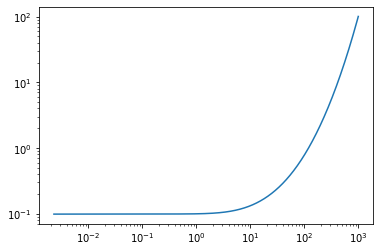

In [118]:
plt.plot(z,dt/tcross)
plt.xscale('log')
plt.yscale('log')